### Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import *
from keras.models import Sequential
from keras.preprocessing import image

### Load Dataset

In [2]:
!wget http://cb.lk/covid_19

--2020-12-21 13:24:22--  http://cb.lk/covid_19
Resolving cb.lk (cb.lk)... 159.89.170.74
Connecting to cb.lk (cb.lk)|159.89.170.74|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cb.lk/covid_19 [following]
--2020-12-21 13:24:23--  https://cb.lk/covid_19
Connecting to cb.lk (cb.lk)|159.89.170.74|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0 [following]
--2020-12-21 13:24:24--  https://www.dropbox.com/s/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.4.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.4.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/7rjw6oet4za01op/CovidDataset-20200427T133042Z-001.zip [following]
--2020-12-21 13:24:24--  https://www.dropbox.com/s/raw/7

In [3]:
!unzip covid_19

Archive:  covid_19
replace CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg  
  inflating: CovidDataset/Val/Covid/85E52EB3-56E9-4D67-82DA-DEA247C82886.jpeg  
  inflating: CovidDataset/Val/Covid/4-x-day1.jpg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-53.jpg  
  inflating: CovidDataset/Val/Covid/4e43e48d52c9e2d4c6c1fb9bc1544f_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/covid-19-pneumonia-35-1.jpg  
  inflating: CovidDataset/Val/Covid/53EC07C9-5CC6-4BE4-9B6F-D7B0D72AAA7E.jpeg  
  inflating: CovidDataset/Val/Covid/6CB4EFC6-68FA-4CD5-940C-BEFA8DAFE9A7.jpeg  
  inflating: CovidDataset/Val/Covid/58cb9263f16e94305c730685358e4e_jumbo.jpeg  
  inflating: CovidDataset/Val/Covid/6b3bdbc31f65230b8cdcc3cef5f8ba8a-40ac-0.jpg  
  inflating: CovidDataset/Val/Covid/auntminnie-d-2020_01_

In [4]:
TRAIN_PATH = "CovidDataset/Train"
VAL_PATH = "CovidDataset/Val"

### Model Creation and Compilation

In [25]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 220, 220, 64)      18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 110, 110, 64)      0         
_________________________________________________________________
dropout_12 (Dropout)         (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 108, 108, 64)      36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 54, 54, 64)       

In [26]:
train_datagen = image.ImageDataGenerator(
    rescale = 1.0/255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_data = image.ImageDataGenerator(rescale=1./255)

In [27]:
train_generator = train_datagen.flow_from_directory(
    TRAIN_PATH,
    target_size = (224,224),
    batch_size=32,
    class_mode = 'binary' )

Found 224 images belonging to 2 classes.


In [28]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [29]:
val_generator = test_data.flow_from_directory(
    VAL_PATH,
    target_size = (224,224),
    batch_size=32,
    class_mode = 'binary' )

Found 60 images belonging to 2 classes.


In [30]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch = 7,
    epochs=10,
    validation_data = val_generator,
    validation_steps=2

)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
7/7 [==============================] - 10s 1s/step - loss: 0.8638 - accuracy: 0.5052 - val_loss: 0.6722 - val_accuracy: 0.7667
Epoch 2/10
7/7 [==============================] - 9s 1s/step - loss: 0.5787 - accuracy: 0.7570 - val_loss: 0.3510 - val_accuracy: 0.9333
Epoch 3/10
7/7 [==============================] - 9s 1s/step - loss: 0.3201 - accuracy: 0.8557 - val_loss: 0.3697 - val_accuracy: 0.9500
Epoch 4/10
7/7 [==============================] - 9s 1s/step - loss: 0.3131 - accuracy: 0.8558 - val_loss: 0.1209 - val_accuracy: 0.9500
Epoch 5/10
7/7 [==============================] - 9s 1s/step - loss: 0.1970 - accuracy: 0.9166 - val_loss: 0.1049 - val_accuracy: 0.9833
Epoch 6/10
7/7 [==============================] - 9s 1s/step - loss: 0.1506 - accuracy: 0.9362 - val_loss: 0.0772 - val_accuracy: 0.9833
Epoch 7/10
7/7 [==============================] - 9s 1s/step - loss: 0.1310 - accuracy: 0.9531 - val_loss: 0.0590 - val_accuracy: 1.0000
Epoch 8/10
7/7 [========================

### Visualizing the performance

In [31]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']

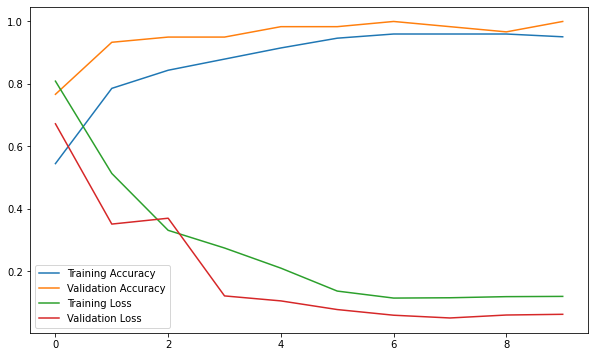

In [32]:
plt.figure(figsize=(10,6))
plt.plot(acc,label = 'Training Accuracy')
plt.plot(val_acc,label = 'Validation Accuracy')
plt.plot(train_loss,label = 'Training Loss')
plt.plot(val_loss,label = 'Validation Loss')
plt.legend()
plt.show()